# **Problemas estaticamente indeterminados**

Esses são os problemas cujas reações de apoio e as forças internas não podem ser determinados estaticamente, pois suas equações de corpo livre devem ser complementadas por relações que envolvam deformações.

In [2]:
!pip install docxtpl
!pip install engineering_notation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 7.9 MB/s 
  Created wheel for docxcompose: filename=docxcompose-1.3.5-py3-none-any.whl size=22162 sha256=bd475d6d1d31b265a3fef27a51627dda27b77685b94aa280c786977151a44407
  Stored in directory: /root/.cache/pip/wheels/c8/1e/26/2fb5a4e66d2e90f10f86e5b5821cb599b4ed8b168d07015553
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=12c0c08b6e1dba80045352948e8a8cb63ecbcf072a884a35a3587214af1dfa31
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built docxcompose python-docx
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Mas.. o que determina que um problema seja estaticamente indeterminado?

### Método da superposição
A estrutura é estaticamente indeterminada quando está ligada a mais suportes que o necessário para manter seu equilíbrio. Logo, o número de reações é maior que o número de equações de equilíbrio.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docxtpl import DocxTemplate, InlineImage
from engineering_notation import EngNumber
from docx.shared import Mm

#### **Observe agora um exemplo de problema:** 
Um tubo de aluminio 2014-T6 com area de seção transversal de 600 mm² é usado como luva para um parafuso de aço A-36 com área da seção transversal de 400mm². Quando a temperatura é T1=15°C, a porca mantém o conjunto apertado em uma posição tal que a força axial no parafuso é desprezível. Se a temperatura aumentar para T2=80°C, qual será a tensão normal média no parafuso e na luva?


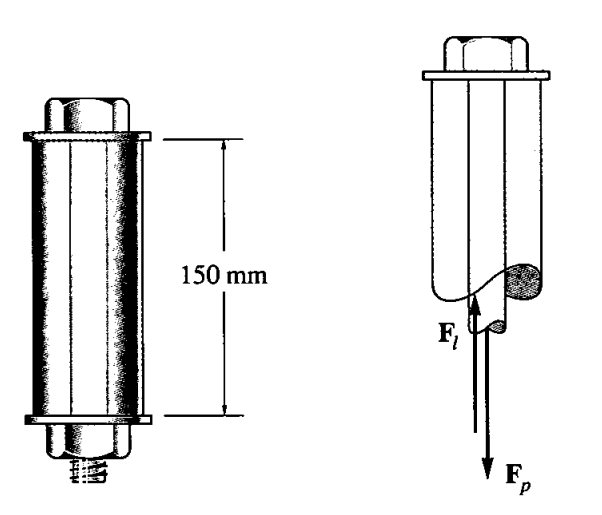

In [4]:
doc = DocxTemplate('docAutomatizado.docx')
doc

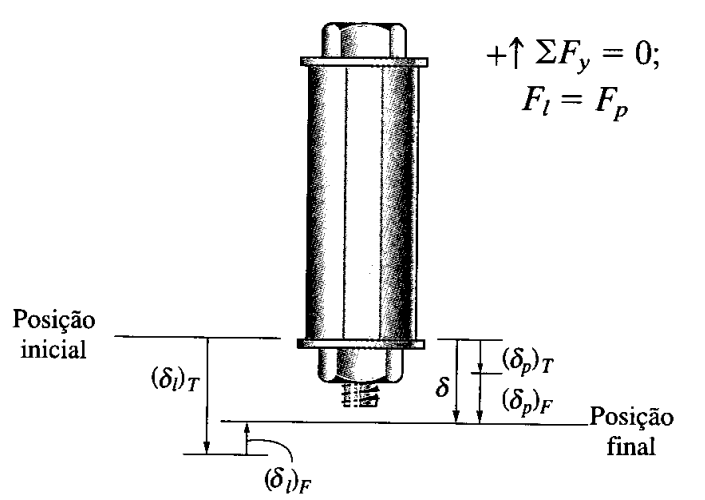

A extremidade do conjunto atinge uma posição final diferente da inicial. Então, a condição de compatibilidade torna-se:

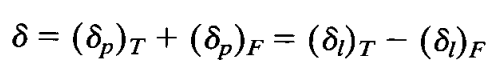

Aplicando as equações acima e as propriedades térmicas e mecânicas de tabelas (Hibbeler):

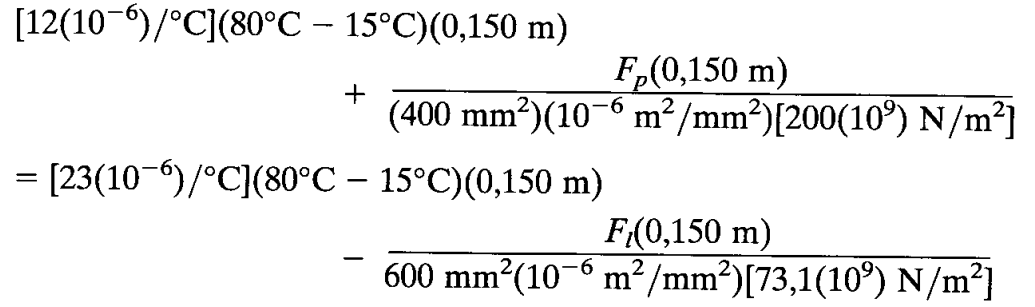

Usando as equações, têm-se:

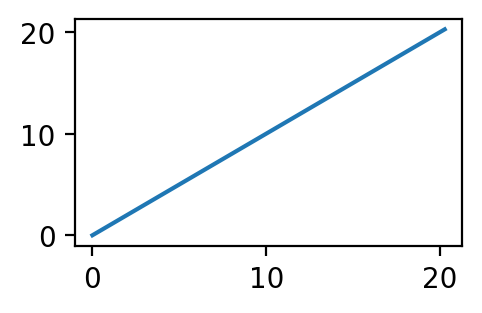

In [5]:
x = np.linspace(0, 20.26, 200)
fig = plt.figure(dpi=200, figsize=(2.5, 1.5))
plt.plot(x, x)

In [6]:
fig.savefig("Grafico", dpi=200, bbox_inches='tight')

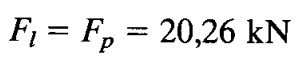

In [7]:
imagem = InlineImage(doc, 'figura1.png', width=Mm(100))   
context1 = {'figura1': imagem}

A tensão média no parafuso e na luva é, portanto:

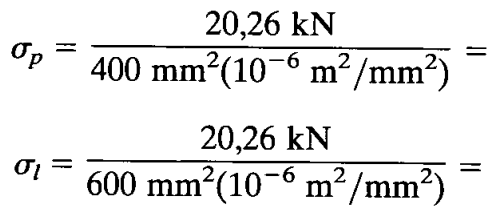

In [18]:
tensaop= (20.26*1000)/(400*10^-6) 
tensaol= (20.26*1000)/(600*10^-6)

In [19]:
context0 = {'tensaoParafuso': tensaop}
context2 = {'tensaoLuva': tensaol}

In [20]:
doc.render(context0)

In [21]:
doc.render(context2)

In [22]:
doc.save('docRespostas.docx')